<a href="https://colab.research.google.com/github/NoeliaFerrero/Proyecto_MentoriaFAMAF_2024/blob/main/Ej_Geocoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo Practico de Proyecto de Geolocalizacion

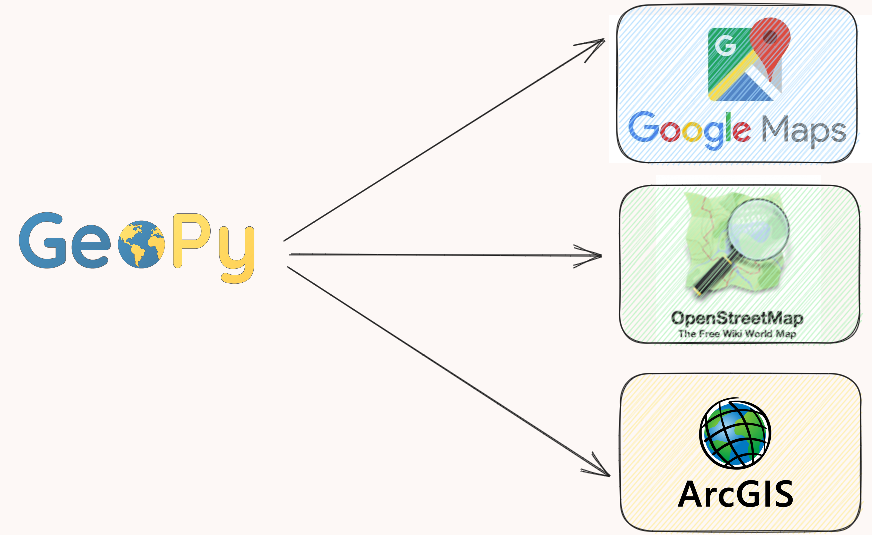

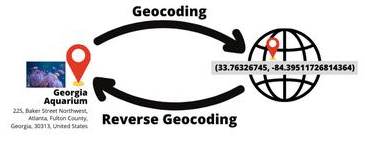

### Material de Consulta

https://medium.com/@rahulmallah785671/geopy-library-in-python-how-to-calculate-distance-between-two-locations-with-precision-f29e95175f28

https://www.datacamp.com/tutorial/geocoding-for-data-scientists


### **1.Instalación de librerias a utilizar**


In [ ]:
!pip install geopy
!pip install pandas
!pip install geopandas
!pip install mapclassify

### **2.Llamado o activación de librerias**

In [ ]:
from geopy.geocoders import Nominatim, ArcGIS, MapBox
import pandas as pd
import geopandas as gpd
from functools import partial

### **3.Lectura de los datos crudos en formato excel**

In [ ]:
url = 'https://github.com/geografope/geocodificacion-con-python/raw/main/rawdata/rawdata.xlsx'
rawdata = pd.read_excel(url)

In [ ]:
rawdata.shape

(19, 4)

### **4.Función para estandarizar extructura de texto para geocodificar**

In [ ]:
# Forma estandar de la estructura del texto para geodificar con Nominatim:
# direccion,distrito,provincia,departamento,pais
# Ejemplo: "Calle Los Angeles 123, Carabayllo, Lima, Lima, Perú"
def concatenar_campos(row):
    return f"{row['direccion']}, {row['distrito']}, {row['provincia']}, {row['departamento']}, Perú"

In [ ]:
rawdata['nogeo'] = rawdata.apply(concatenar_campos, axis= 1)
rawdata.head()

In [ ]:
rawdata_for_osm = rawdata.copy()
rawdata_for_mapbox = rawdata.copy()
rawdata_for_arcgis = rawdata.copy()

### **5.Gecodificación directa con la API de OSM**
- Nominatim: Es una herramienta open source que sirve para realizar proceso de geocodificación a través de OpenSteetMap.
Referencia: *https://github.com/osm-search/Nominatim*

In [ ]:
# Gecodificación directa
geolocator = Nominatim(user_agent="geografo_pe",timeout = 5)
geocode = partial(geolocator.geocode, language="es")
def tidygeocode(row):
    location = geolocator.geocode(row['nogeo'])
    if location:
        return pd.Series({'latitude': location.latitude, 'longitude': location.longitude})
    else:
        return pd.Series({'latitude': None, 'longitude': None})

In [ ]:
rawdata_for_osm[['latitude', 'longitude']] = rawdata_for_osm.apply(tidygeocode, axis=1)

In [ ]:
rawdata_for_osm

,departamento,provincia,distrito,direccion,nogeo,latitude,longitude
0,Lima,Lima,Santa Anita,"Carretera Central 167, Santa Anita 15008","Carretera Central 167, Santa Anita 15008, Sant...",-12.045751,-76.942885
1,Lima,Lima,Santa Anita,"Jiron los Eucaliptos 996, La Molina 15023","Jiron los Eucaliptos 996, La Molina 15023, San...",NaN,NaN
2,Lima,Lima,Santa Anita,"Avenida Metropolitana Mz M Lot 4, Ate 15026","Avenida Metropolitana Mz M Lot 4, Ate 15026, S...",NaN,NaN
3,Lima,Lima,Lurigancho,"Los Robles, Lima 15457","Los Robles, Lima 15457, Lurigancho, Lima, Lima...",-12.010709,-76.909938
4,Lima,Lima,Lurigancho,"Avenida las Torres 276, Lima, Ate 15498","Avenida las Torres 276, Lima, Ate 15498, Lurig...",-12.014345,-76.900770
5,Lima,Lima,Lurigancho,"Avenida Nicolás Ayllón 7208, Ate 15487","Avenida Nicolás Ayllón 7208, Ate 15487, Luriga...",NaN,NaN
6,Lima,Lima,Lurigancho,"La Capitana 190, Lurigancho-Chosica 15461","La Capitana 190, Lurigancho-Chosica 15461, Lur...",NaN,NaN
7,Lima,Lima,Surquillo,"Avenida Angamos Este 1807-1803, Surquillo 15036","Avenida Angamos Este 1807-1803, Surquillo 1503...",NaN,NaN
8,Lima,Lima,Surquillo,"Avenida República de Panamá 4295, Surquillo 15048","Avenida República de Panamá 4295, Surquillo 15...",-12.116153,-77.018354
9,Lima,Lima,Surquillo,"Gonzáles Prada, Surquillo 15047","Gonzáles Prada, Surquillo 15047, Surquillo, Li...",-12.116403,-77.021011


### **6.Visualización de datos espaciales**

In [ ]:
# Eliminar datos vacios
geo_rawdata = rawdata_for_osm.dropna()
# Dataframe a gepandas
geo_rawdata = gpd.GeoDataFrame(data = geo_rawdata, geometry=gpd.points_from_xy(geo_rawdata.longitude, geo_rawdata.latitude),crs = 4326)

In [ ]:
# Visualización interactiva
geo_rawdata.explore(tiles = "Esri.WorldImagery",marker_kwds={'radius': 10} )

### **7.Geocodificación inversa**

In [ ]:
# Geocodificación indirecta
def tidygeocode_inv(row):
  adress = geolocator.reverse([row['latitude'],row['longitude']])
  return(str(adress))

In [ ]:
geocode_inv = geo_rawdata.copy()

In [ ]:
geocode_inv['direccion_geo_inv'] = geocode_inv.apply(tidygeocode_inv, axis = 1)

In [ ]:
geocode_inv = geocode_inv.drop(columns=['geometry'])
geocode_inv = gpd.GeoDataFrame(data = geocode_inv, geometry=gpd.points_from_xy(geo_rawdata.longitude, geo_rawdata.latitude),crs = 4326)

In [ ]:
geocode_inv

### **8.Exportar datos espaciales**

In [ ]:
# Exportar datos en formato gpkg
geo_rawdata.to_file('geocoding_directo.gpkg')
geocode_inv.to_file('geocoding_inverso.gpkg')

### **9.Gecodificación usando la API de MapBox**
Para poder optener nuestra API de MapBox tenemos que registrarnos en el siguiente enlace:
 - Registro: *https://account.mapbox.com/auth/signup/*
 - Activar API: *https://account.mapbox.com/access-tokens/create*

#### *Geocodificación gratis: 100 000 al mes*

In [ ]:
api_mapbox = 'PON_TU_API_KEY_AQUI'
geolocator = MapBox(api_key = api_mapbox)
def tidygeocode(row):
    location = geolocator.geocode(row['nogeo'])
    if location:
        return pd.Series({'latitude': location.latitude, 'longitude': location.longitude})
    else:
        return pd.Series({'latitude': None, 'longitude': None})

In [ ]:
rawdata_for_mapbox[['latitude', 'longitude']] = rawdata_for_mapbox.apply(tidygeocode, axis=1)

In [ ]:
rawdata_for_mapbox

,departamento,provincia,distrito,direccion,nogeo,latitude,longitude
0,Lima,Lima,Santa Anita,"Carretera Central 167, Santa Anita 15008","Carretera Central 167, Santa Anita 15008, Sant...",-12.048364,-76.971911
1,Lima,Lima,Santa Anita,"Jiron los Eucaliptos 996, La Molina 15023","Jiron los Eucaliptos 996, La Molina 15023, San...",-12.089682,-76.957556
2,Lima,Lima,Santa Anita,"Avenida Metropolitana Mz M Lot 4, Ate 15026","Avenida Metropolitana Mz M Lot 4, Ate 15026, S...",-12.042531,-76.962451
3,Lima,Lima,Lurigancho,"Los Robles, Lima 15457","Los Robles, Lima 15457, Lurigancho, Lima, Lima...",-12.010709,-76.909938
4,Lima,Lima,Lurigancho,"Avenida las Torres 276, Lima, Ate 15498","Avenida las Torres 276, Lima, Ate 15498, Lurig...",-12.001441,-76.921296
5,Lima,Lima,Lurigancho,"Avenida Nicolás Ayllón 7208, Ate 15487","Avenida Nicolás Ayllón 7208, Ate 15487, Luriga...",-11.957943,-76.728594
6,Lima,Lima,Lurigancho,"La Capitana 190, Lurigancho-Chosica 15461","La Capitana 190, Lurigancho-Chosica 15461, Lur...",-11.972625,-76.931578
7,Lima,Lima,Surquillo,"Avenida Angamos Este 1807-1803, Surquillo 15036","Avenida Angamos Este 1807-1803, Surquillo 1503...",-12.109998,-76.979985
8,Lima,Lima,Surquillo,"Avenida República de Panamá 4295, Surquillo 15048","Avenida República de Panamá 4295, Surquillo 15...",-12.110501,-77.018335
9,Lima,Lima,Surquillo,"Gonzáles Prada, Surquillo 15047","Gonzáles Prada, Surquillo 15047, Surquillo, Li...",-12.116907,-77.019599


### **10.Gecodificación usando la API de ArcGIS**
Para poder optener nuestra API de ArcGIS tenemos que registrarnos en el siguiente enlace:
 * Registro: *https://developers.arcgis.com/sign-up/*
 * Activar API: *https://developers.arcgis.com/dashboard/#*

#### *Geocodificación gratis: 20 000 gratis*

In [ ]:
api_arcgis = 'PON_TU_API_KEY_AQUI'
geolocator = ArcGIS(auth_domain = api_arcgis)
def tidygeocode(row):
    location = geolocator.geocode(row['nogeo'])
    if location:
        return pd.Series({'latitude': location.latitude, 'longitude': location.longitude})
    else:
        return pd.Series({'latitude': None, 'longitude': None})

In [ ]:
rawdata_for_arcgis[['latitude', 'longitude']] = rawdata_for_arcgis.apply(tidygeocode, axis=1)

In [ ]:
rawdata_for_arcgis

,departamento,provincia,distrito,direccion,nogeo,latitude,longitude
0,Lima,Lima,Santa Anita,"Carretera Central 167, Santa Anita 15008","Carretera Central 167, Santa Anita 15008, Sant...",-12.056697,-76.969772
1,Lima,Lima,Santa Anita,"Jiron los Eucaliptos 996, La Molina 15023","Jiron los Eucaliptos 996, La Molina 15023, San...",-12.065913,-76.967481
2,Lima,Lima,Santa Anita,"Avenida Metropolitana Mz M Lot 4, Ate 15026","Avenida Metropolitana Mz M Lot 4, Ate 15026, S...",-12.033272,-76.940326
3,Lima,Lima,Lurigancho,"Los Robles, Lima 15457","Los Robles, Lima 15457, Lurigancho, Lima, Lima...",-12.010731,-76.909908
4,Lima,Lima,Lurigancho,"Avenida las Torres 276, Lima, Ate 15498","Avenida las Torres 276, Lima, Ate 15498, Lurig...",-12.009716,-76.905490
5,Lima,Lima,Lurigancho,"Avenida Nicolás Ayllón 7208, Ate 15487","Avenida Nicolás Ayllón 7208, Ate 15487, Luriga...",-12.015194,-76.886799
6,Lima,Lima,Lurigancho,"La Capitana 190, Lurigancho-Chosica 15461","La Capitana 190, Lurigancho-Chosica 15461, Lur...",-12.009340,-76.905460
7,Lima,Lima,Surquillo,"Avenida Angamos Este 1807-1803, Surquillo 15036","Avenida Angamos Este 1807-1803, Surquillo 1503...",-12.112210,-77.010670
8,Lima,Lima,Surquillo,"Avenida República de Panamá 4295, Surquillo 15048","Avenida República de Panamá 4295, Surquillo 15...",-12.107650,-77.018440
9,Lima,Lima,Surquillo,"Gonzáles Prada, Surquillo 15047","Gonzáles Prada, Surquillo 15047, Surquillo, Li...",-12.116500,-77.022113
